# CVaR-QRDQN Demo

This notebook demonstrates the training and evaluation of the CVaR-QRDQN model on the LunarLander-v2 environment.

In [1]:
# -*- coding: utf-8 -*-
"""
Training script for CVaR-QRDQN
"""

import os
os.chdir(r'G:\我的雲端硬碟\Academic\PhD\Projects\RL Demo\CVaR-QRDQN')
import numpy as np
import torch
import matplotlib.pyplot as plt
from environment import create_environment
from agent import Agent
from evaluate import evaluate

env_name = "LunarLander-v2"
num_episodes = 2000
max_steps = 1000
epsilon_start = 1.0
epsilon_end = 0.01
epsilon_decay = 0.995
lr = 0.001
gamma = 0.99

Training the DQN model...
Episode 1/2000, Total Reward: -114.68737038511469
Episode 2/2000, Total Reward: -194.36758063994026
Episode 3/2000, Total Reward: -122.86814048471828
Episode 4/2000, Total Reward: -281.19504263793726
Episode 5/2000, Total Reward: -227.7217708539961
Episode 6/2000, Total Reward: -277.1364896841842
Episode 7/2000, Total Reward: -116.22870800912453
Episode 8/2000, Total Reward: -411.127222734434
Episode 9/2000, Total Reward: -5.122963275417916
Episode 10/2000, Total Reward: -282.12225313330714
Episode 11/2000, Total Reward: -133.12153264327947
Episode 12/2000, Total Reward: -109.87410155255515
Episode 13/2000, Total Reward: -342.98594645064225
Episode 14/2000, Total Reward: -320.5606620031564
Episode 15/2000, Total Reward: -158.21313478504922
Episode 16/2000, Total Reward: -136.0153858393895
Episode 17/2000, Total Reward: -242.0717503105405
Episode 18/2000, Total Reward: -184.34655561555275
Episode 19/2000, Total Reward: -115.70755119600018
Episode 20/2000, Total

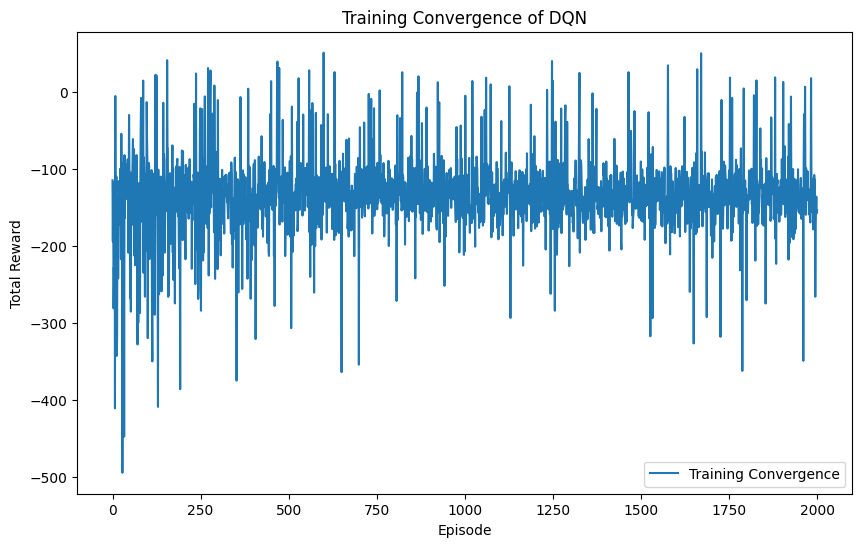

Evaluating the DQN model...
Episode 1/10, Reward: -139.7776080634737
Episode 2/10, Reward: -99.52919079435839
Episode 3/10, Reward: -164.90622578443146
Episode 4/10, Reward: -81.076395645698
Episode 5/10, Reward: -130.3555305064769
Episode 6/10, Reward: -166.10275320681913
Episode 7/10, Reward: 9.482282156487187
Episode 8/10, Reward: -117.14527839417067
Episode 9/10, Reward: -134.37835395624379
Episode 10/10, Reward: -146.11902797098057


In [2]:
def train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles):
    env = create_environment(env_name)
    agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)

    epsilon = epsilon_start
    convergence = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.select_action(state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            
            states, actions, rewards, next_states, dones = \
                np.array(state)[np.newaxis, :], np.array([action])[np.newaxis, :], np.array([reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([done], dtype=np.bool_)[np.newaxis, :]
            agent.update(batch=(states, actions, rewards, next_states, dones))

            state = next_state
            if done:
                break

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        convergence.append(total_reward)

    # Plot the convergence
    plt.figure(figsize=(10, 6))
    plt.plot(convergence, label='Training Convergence')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Training Convergence of DQN')
    plt.legend()
    plt.show()
    
    # Save the model
    torch.save(agent.model.state_dict(), "dqn_model.pth")

if __name__ == "__main__":
    cvar_alpha = 0.1 # dummy value
    num_quantiles = 1

    # Train the model
    print("Training the DQN model...")
    train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles)

    # Evaluate the model
    model_path = "dqn_model.pth"
    num_eval_episodes = 10
    print("Evaluating the DQN model...")
    evaluate(env_name, model_path, num_eval_episodes, max_steps, num_quantiles)

    # Create environment and agent
    env = create_environment(env_name)
    dqn_agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)
    dqn_agent.model.load_state_dict(torch.load(model_path, weights_only=True))



Training the CVaR-QRDQN model...
Episode 1/2000, Total Reward: -272.2844957199848
Episode 2/2000, Total Reward: -448.7133480242478
Episode 3/2000, Total Reward: -224.7256856607351
Episode 4/2000, Total Reward: -93.29489061981688
Episode 5/2000, Total Reward: -85.33897446251173
Episode 6/2000, Total Reward: -137.79770295742992
Episode 7/2000, Total Reward: -66.12127239645224
Episode 8/2000, Total Reward: -334.0063201451807
Episode 9/2000, Total Reward: -123.07603831622126
Episode 10/2000, Total Reward: -107.70605028778441
Episode 11/2000, Total Reward: -50.51293420705219
Episode 12/2000, Total Reward: -228.84458774672598
Episode 13/2000, Total Reward: -116.51115471920612
Episode 14/2000, Total Reward: -125.87251840115451
Episode 15/2000, Total Reward: -149.220858159623
Episode 16/2000, Total Reward: -102.54394839879544
Episode 17/2000, Total Reward: -357.8700982637627
Episode 18/2000, Total Reward: -205.25312732661325
Episode 19/2000, Total Reward: -190.6908837293101
Episode 20/2000, To

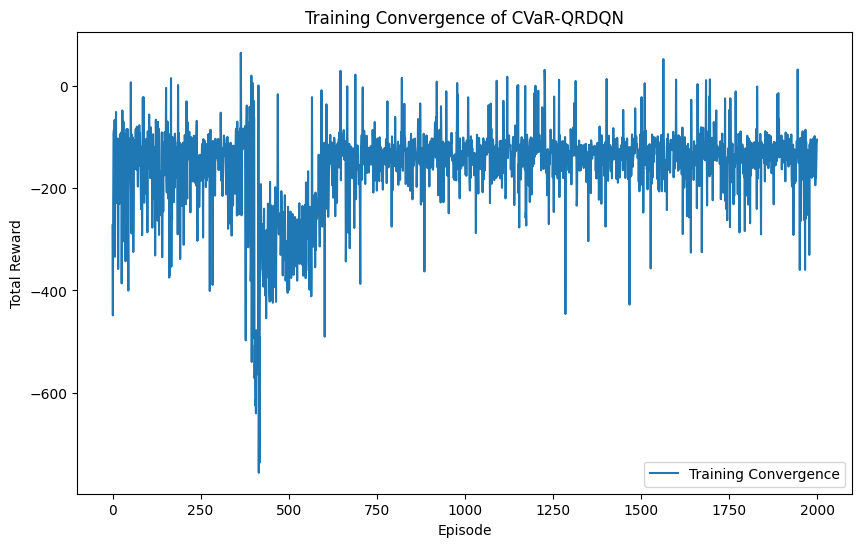

Evaluating the CVaR-QRDQN model...
Episode 1/10, Reward: -194.80148223127168
Episode 2/10, Reward: -92.74102033191836
Episode 3/10, Reward: -118.03396699621396
Episode 4/10, Reward: -140.63032691106076
Episode 5/10, Reward: -105.13296335167962
Episode 6/10, Reward: -126.58012559239413
Episode 7/10, Reward: -272.7653195972863
Episode 8/10, Reward: -196.5237455285579
Episode 9/10, Reward: -106.97761174606129
Episode 10/10, Reward: -156.39232894975356


In [3]:
def train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles):
    env = create_environment(env_name)
    agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)

    epsilon = epsilon_start
    convergence = []
    for episode in range(num_episodes):
        state, _ = env.reset()
        total_reward = 0

        for step in range(max_steps):
            action = agent.select_action(state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            
            states, actions, rewards, next_states, dones = \
                np.array(state)[np.newaxis, :], np.array([action])[np.newaxis, :], np.array([reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([done], dtype=np.bool_)[np.newaxis, :]
            agent.update(batch=(states, actions, rewards, next_states, dones))

            state = next_state
            if done:
                break

        epsilon = max(epsilon_end, epsilon * epsilon_decay)
        print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        convergence.append(total_reward)

    # Plot the convergence
    plt.figure(figsize=(10, 6))
    plt.plot(convergence, label='Training Convergence')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title('Training Convergence of CVaR-QRDQN')
    plt.legend()
    plt.show()

    # Save the model
    torch.save(agent.model.state_dict(), "cvar_qrdqn_model.pth")

if __name__ == "__main__":
    cvar_alpha = 0.1
    num_quantiles = 50

    # Train the model
    print("Training the CVaR-QRDQN model...")
    train(env_name, num_episodes, max_steps, epsilon_start, epsilon_end, epsilon_decay, lr, gamma, cvar_alpha, num_quantiles)

    # Evaluate the model
    model_path = "cvar_qrdqn_model.pth"
    num_eval_episodes = 10
    print("Evaluating the CVaR-QRDQN model...")
    evaluate(env_name, model_path, num_eval_episodes, max_steps, num_quantiles)

    # Create environment and agent
    env = create_environment(env_name)
    cvar_qrdqn_agent = Agent(env.observation_space.shape[0], env.action_space.n, num_quantiles, lr, gamma, cvar_alpha)
    cvar_qrdqn_agent.model.load_state_dict(torch.load(model_path, weights_only=True))



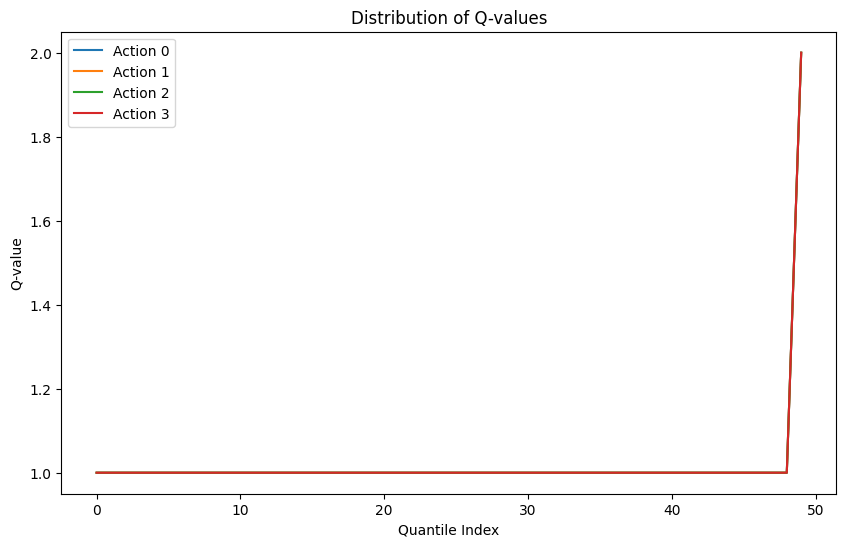

In [4]:
# Display Q-values for a sample state
state, info = env.reset()
state_tensor = torch.FloatTensor(state).unsqueeze(0)

quantiles = cvar_qrdqn_agent.model(state_tensor)
# q_values = quantiles.mean(dim=-1).detach().numpy()
# print("Q-values for the sample state:", q_values)

# Plot the distribution of Q-values
plt.figure(figsize=(10, 6))
for action in range(env.action_space.n):
    plt.plot(quantiles[0, action, :].detach().numpy(), label=f'Action {action}')
plt.xlabel('Quantile Index')
plt.ylabel('Q-value')
plt.title('Distribution of Q-values')
plt.legend()
plt.show()

In [ ]:

import matplotlib.pyplot as plt

dqn_rewards = []
cvar_rewards = []

for episode in range(num_episodes):
    # Reset environment
    dqn_env = create_environment(env_name)
    cvar_env = create_environment(env_name)
    dqn_state, _ = dqn_env.reset()
    cvar_state, _ = cvar_env.reset()
    dqn_total_reward = 0
    cvar_total_reward = 0
    
    for step in range(max_steps):
        # DQN agent step
        dqn_action = dqn_agent.select_action(dqn_state, epsilon=0.1)
        next_state, dqn_reward, dqn_done, dqn_truncated, _ = dqn_env.step(dqn_action)
        dqn_total_reward += dqn_reward
        states, actions, rewards, next_states, dones = \
            np.array(state)[np.newaxis, :], np.array([dqn_action])[np.newaxis, :], np.array([dqn_reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([(dqn_done or dqn_truncated)], dtype=np.bool_)[np.newaxis, :]
        dqn_agent.update(batch=(states, actions, rewards, next_states, dones))

        # CVaR-QRDQN agent step
        cvar_action = cvar_qrdqn_agent.select_action(cvar_state, epsilon=0.1)  # or some epsilon value
        next_state_cvar, cvar_reward, cvar_done, cvar_truncated, _ = cvar_env.step(cvar_action)
        cvar_total_reward += cvar_reward
        states, actions, rewards, next_states, dones = \
            np.array(state)[np.newaxis, :], np.array([cvar_action])[np.newaxis, :], np.array([cvar_reward])[np.newaxis, :], np.array(next_state)[np.newaxis, :], np.array([(cvar_done or cvar_truncated)], dtype=np.bool_)[np.newaxis, :]
        cvar_qrdqn_agent.update(batch=(states, actions, rewards, next_states, dones))

        # Move to the next state (shared environment example)
        state = next_state

        # Stop if either agent's episode ended
        if dqn_done or dqn_truncated or cvar_done or cvar_truncated:
            break

    dqn_rewards.append(dqn_total_reward)
    cvar_rewards.append(cvar_total_reward)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(dqn_rewards, alpha=0.5, label='DQN Agent')
plt.plot(cvar_rewards, alpha=0.5, label='CVaR-QRDQN Agent')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.title('Comparison: DQN vs CVaR-QRDQN')
plt.legend()
plt.show()

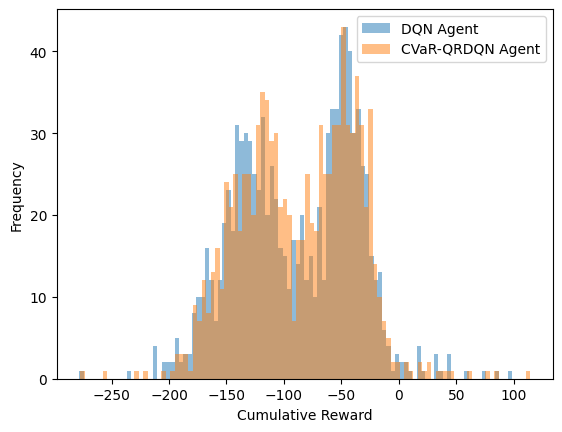

In [7]:
bins = 100

plt.hist(dqn_rewards, bins, alpha=0.5, label='DQN Agent')
plt.hist(cvar_rewards, bins, alpha=0.5, label='CVaR-QRDQN Agent')
plt.xlabel('Cumulative Reward')
plt.ylabel('Frequency')
plt.legend()
plt.show()